In [789]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [791]:
#Reading the file
data = pd.read_csv("loan.csv" )

/var/folders/hx/jz42g3lx1md5qddcn0hbn0_h0000gn/T/ipykernel_42237/1812837777.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan.csv" )


# Data Cleaning

In [794]:
#Understanding different Columns
data.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN


In [796]:
#Understanding the Total shape of the table
data.shape

(39717, 111)

In [798]:
#Removing all the rows where loan_status is Current as not much inference can be made
data = data[~(data['loan_status'] == 'Current')]

In [800]:
#Clearly we can see many column with Nan values. Getting all the columns with Nan value
data.columns[data.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il

In [802]:
#Dropping all the columns with 60% or more values with null/Nan (60% is the assumption made )
columns_to_drop = []
for column in data.columns:
    nan_percentage = data[column].isna().mean()  # Calculate the percentage of NaN values
    if nan_percentage >= 0.6:
        print(f" {column} percentage {nan_percentage} ")
        columns_to_drop.append(column)

data.drop(columns = columns_to_drop , inplace =True)

 mths_since_last_delinq percentage 0.6455919330170827 
 mths_since_last_record percentage 0.928973222386396 
 next_pymnt_d percentage 1.0 
 mths_since_last_major_derog percentage 1.0 
 annual_inc_joint percentage 1.0 
 dti_joint percentage 1.0 
 verification_status_joint percentage 1.0 
 tot_coll_amt percentage 1.0 
 tot_cur_bal percentage 1.0 
 open_acc_6m percentage 1.0 
 open_il_6m percentage 1.0 
 open_il_12m percentage 1.0 
 open_il_24m percentage 1.0 
 mths_since_rcnt_il percentage 1.0 
 total_bal_il percentage 1.0 
 il_util percentage 1.0 
 open_rv_12m percentage 1.0 
 open_rv_24m percentage 1.0 
 max_bal_bc percentage 1.0 
 all_util percentage 1.0 
 total_rev_hi_lim percentage 1.0 
 inq_fi percentage 1.0 
 total_cu_tl percentage 1.0 
 inq_last_12m percentage 1.0 
 acc_open_past_24mths percentage 1.0 
 avg_cur_bal percentage 1.0 
 bc_open_to_buy percentage 1.0 
 bc_util percentage 1.0 
 mo_sin_old_il_acct percentage 1.0 
 mo_sin_old_rev_tl_op percentage 1.0 
 mo_sin_rcnt_rev_tl_

In [804]:
#Dropping all the columns which has same value for all the rows as they will not have any significance in making inference
columns_with_same_value = []
for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) == 1:
        columns_with_same_value.append(column)

print("Columns with all the same values:")
print(columns_with_same_value)
data.drop(columns = columns_with_same_value , inplace =True)

Columns with all the same values:
['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


In [806]:
#Dropping all the columns which I feel are not relavant in analysing the given problem statement 
list_of_irrelevent_columns = ['id', 'member_id','emp_title',  'url', 'desc','title', 'zip_code', 'earliest_cr_line',
                                 'pub_rec', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                              'recoveries', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
                              'tax_liens', 'collection_recovery_fee', 'total_pymnt'
                             ]
data.drop(columns = list_of_irrelevent_columns , inplace =True)

In [808]:
#Understanding the choosen columns again 
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,total_acc,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,13289.489826,22.052648,0.043479
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,15866.492241,11.425861,0.204583
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,3650.000000,13.000000,0.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,8762.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,16912.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,149588.000000,90.000000,2.000000


In [810]:
#Listing all columns for better understanding
all_columns = data.columns.tolist()
print(len(all_columns))
print(all_columns)

24
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']


In [812]:
#Understanding data type of each column 
for column in data.columns:
    print(f"data type of {column} is {data[column].dtype}")

data type of loan_amnt is int64
data type of funded_amnt is int64
data type of funded_amnt_inv is float64
data type of term is object
data type of int_rate is object
data type of installment is float64
data type of grade is object
data type of sub_grade is object
data type of emp_length is object
data type of home_ownership is object
data type of annual_inc is float64
data type of verification_status is object
data type of issue_d is object
data type of loan_status is object
data type of purpose is object
data type of addr_state is object
data type of dti is float64
data type of delinq_2yrs is int64
data type of inq_last_6mths is int64
data type of open_acc is int64
data type of revol_bal is int64
data type of revol_util is object
data type of total_acc is int64
data type of pub_rec_bankruptcies is float64


In [814]:
#Knowing all the columns with missing value
columns_with_missing_value = data.columns[data.isnull().any()].tolist()
print(columns_with_missing_value)

['emp_length', 'revol_util', 'pub_rec_bankruptcies']


### In below steps will understand emp_length column and impute the missing value

In [817]:
#Describing the column
data['emp_length'].describe()

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [819]:
#As emp_length is a categorical variable Calculating mode value to impute the missing value
data['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [821]:
data['emp_length'] = data['emp_length'].apply(lambda x : '10+ years' if pd.isnull(x) else x )

In [823]:
#Converting the string to more understandable value
def convert_emp_length(val) -> int :
    if(val == '< 1 year'):
        return '0'

    elif(val == '10+ years'):
        return '11'
    else:
        return val.strip().split(' ')[0]

data['emp_length'] = data['emp_length'].apply(convert_emp_length)

In [825]:
#finally re checking the column values
data['emp_length'].describe()

count     38577
unique       11
top          11
freq       9521
Name: emp_length, dtype: object

### In below steps will understand revol_util column and impute the missing value

In [828]:
#Describing the column
data['revol_util'].describe()

count     38527
unique     1088
top          0%
freq        954
Name: revol_util, dtype: object

In [830]:
#Striping the % value 
data['revol_util'] = data['revol_util'].str.rstrip('%').astype(float)

In [832]:
#Calculating Median for imputing the missing values
data['revol_util'].median()

49.1

In [834]:
#Imputing the null values 
data['revol_util'] = data['revol_util'].apply(lambda x : 49.1 if pd.isnull(x) else x )

### In below steps will understand pub_rec_bankruptcies column and impute the missing value 

In [837]:
#Describe pub_rec_bankruptcies column
data['pub_rec_bankruptcies'].describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [839]:
#Imputing with the mean value obtained above
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].apply(lambda x : '0.043479' if pd.isnull(x) else x )

In [841]:
#removing % character in intrest_rate column
data['int_rate'].describe()
data['int_rate'] = data['int_rate'].str.rstrip('%').astype(float)

In [843]:
#Analysing skewness all numerical columns
from scipy.stats import skew
number_columns = data.select_dtypes(include=['int', 'float']).columns
for column in number_columns:
    skewness = skew(data[column])
    print(f"column {column} Skewness: {skewness}")

column loan_amnt Skewness: 1.0780607391688661
column funded_amnt Skewness: 1.1037855131117116
column funded_amnt_inv Skewness: 1.129952902392431
column int_rate Skewness: 0.2936154266062951
column installment Skewness: 1.15044176191471
column annual_inc Skewness: 31.197200632833276
column dti Skewness: -0.026841378673801996
column delinq_2yrs Skewness: 5.033082814688759
column inq_last_6mths Skewness: 1.384335967326453
column open_acc Skewness: 1.007249040062297
column revol_bal Skewness: 3.2118944551313007
column revol_util Skewness: -0.027639855739612675
column total_acc Skewness: 0.8324482083705492


### As Annual income is highly skewed in below section will be normalising and removing outiners

In [846]:

data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

(array([3.8031e+04, 4.5600e+02, 4.2000e+01, 2.6000e+01, 8.0000e+00,
        6.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.00000000e+03, 2.03866667e+05, 4.03733333e+05, 6.03600000e+05,
        8.03466667e+05, 1.00333333e+06, 1.20320000e+06, 1.40306667e+06,
        1.60293333e+06, 1.80280000e+06, 2.00266667e+06, 2.20253333e+06,
        2.40240000e+06, 2.60226667e+06, 2.80213333e+06, 3.00200000e+06,
        3.20186667e+06, 3.40173333e+06, 3.60160000e+06, 3.80146667e+06,
        4.00133333e+06, 4.20120000e+06, 4.40106667e+06, 4.60093333e+06,
        4.80080000e+06, 5.00066667e+06, 5.20053333e+06, 5.40040000e+06,
        5.60026667e+06, 5.80013333e+06, 6.00000000e+06]),
 <BarContainer object of 30 

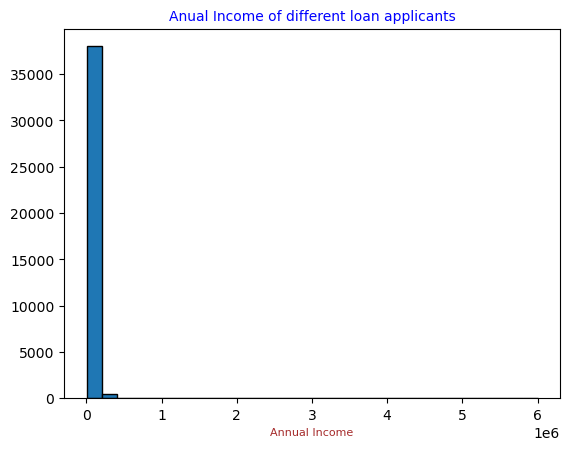

In [848]:
#visualising skewness for anual income
plt.title("Anual Income of different loan applicants", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Annual Income", fontdict={'fontsize': 8, 'fontweight' : 5, 'color' : 'Brown'})
plt.hist(data['annual_inc'], bins=30, edgecolor='black')

{'whiskers': [<matplotlib.lines.Line2D at 0x28ff1a180>,
 'caps': [<matplotlib.lines.Line2D at 0x28ff18920>,
 'boxes': [<matplotlib.lines.Line2D at 0x290461730>],
 'medians': [<matplotlib.lines.Line2D at 0x2919e61b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2919e6cc0>],
 'means': []}

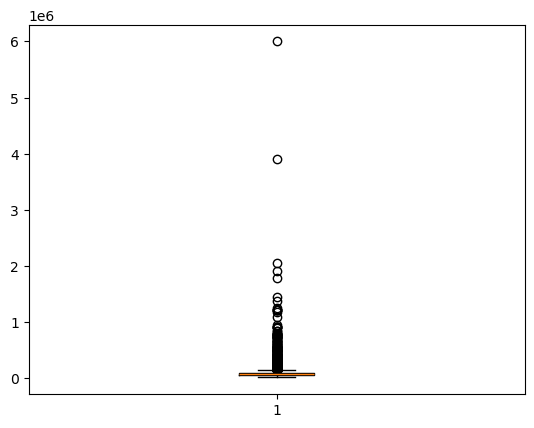

In [850]:
#As its highly right skewed understanding outliners with box polt
plt.boxplot(data=data, x='annual_inc')

{'whiskers': [<matplotlib.lines.Line2D at 0x29018ab10>,
 'caps': [<matplotlib.lines.Line2D at 0x29018a5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29018ad80>],
 'medians': [<matplotlib.lines.Line2D at 0x29018a030>],
 'fliers': [<matplotlib.lines.Line2D at 0x290189d90>],
 'means': []}

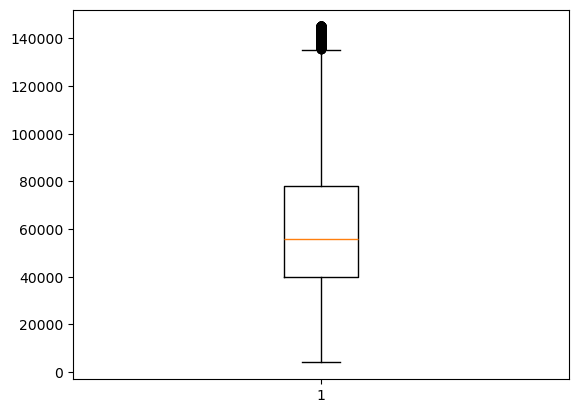

In [852]:
#Removing outliners with standard formula
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_removed = data[(data['annual_inc'] >= lower_bound) & (data['annual_inc'] <= upper_bound)]
plt.boxplot(data=outliers_removed, x='annual_inc')

(array([  45.,  248.,  556.,  752., 1510., 2093., 2290., 2605., 2738.,
        2822., 2541., 2786., 2181., 1088., 1963., 1668., 1329., 1224.,
        1076.,  822.,  988.,  506.,  605.,  358.,  670.,  381.,  318.,
         216.,  275.,  161.]),
 array([  4000.,   8700.,  13400.,  18100.,  22800.,  27500.,  32200.,
         36900.,  41600.,  46300.,  51000.,  55700.,  60400.,  65100.,
         69800.,  74500.,  79200.,  83900.,  88600.,  93300.,  98000.,
        102700., 107400., 112100., 116800., 121500., 126200., 130900.,
        135600., 140300., 145000.]),
 <BarContainer object of 30 artists>)

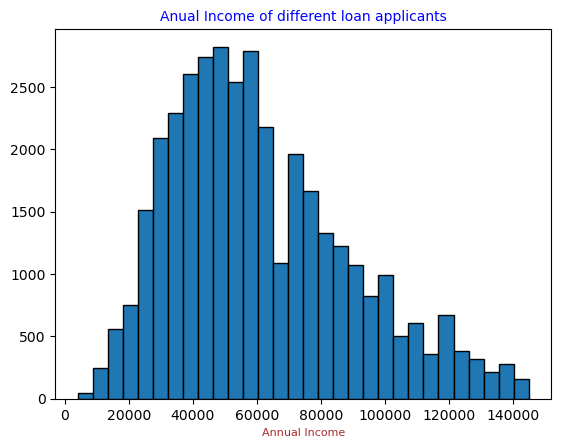

In [854]:
#Histogram plot for anual income after removing outliners
plt.title("Anual Income of different loan applicants", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'blue'})
plt.xlabel("Annual Income", fontdict={'fontsize': 8, 'fontweight' : 5, 'color' : 'Brown'})
plt.hist(outliers_removed['annual_inc'], bins=30, edgecolor='black')

#### We can observe that after removing outlines the hist graph center oriantes

# Univariant Analysis

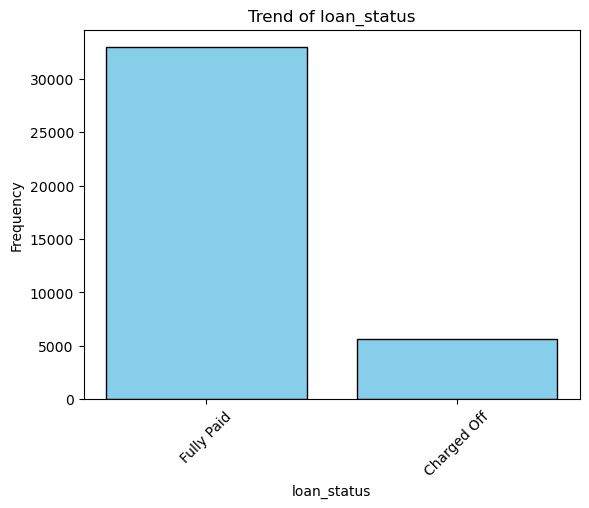

In [858]:
#Visualising which sort of employee take more loan 
emp_length_counts = data['loan_status'].value_counts()
plt.bar(emp_length_counts.index, emp_length_counts.values, color='skyblue', edgecolor='black')
plt.title('Trend of loan_status')
plt.xlabel('loan_status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

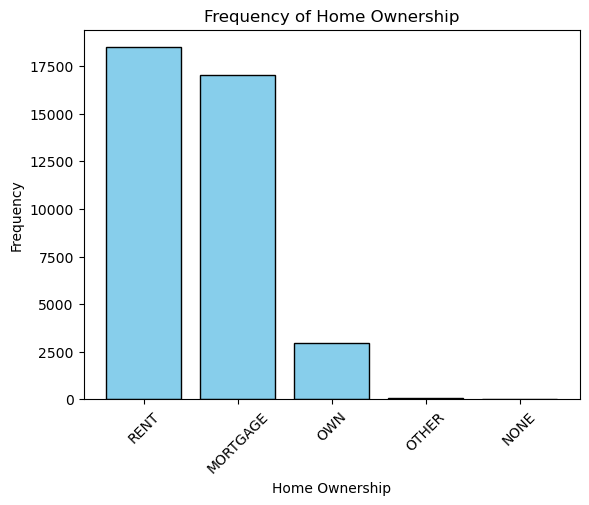

In [860]:
#Visualising does people Home Ownership impact the people who take loan 
emp_length_counts = data['home_ownership'].value_counts()
plt.bar(emp_length_counts.index, emp_length_counts.values, color='skyblue', edgecolor='black')
plt.title('Frequency of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [862]:
#converting issue data to proper date time format for analysis and adding issues_year and issue_month for more analysis
data['issue_d'].describe()
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['issue_month'] = data['issue_d'].dt.month
data['issue_year'] = data['issue_d'].dt.year

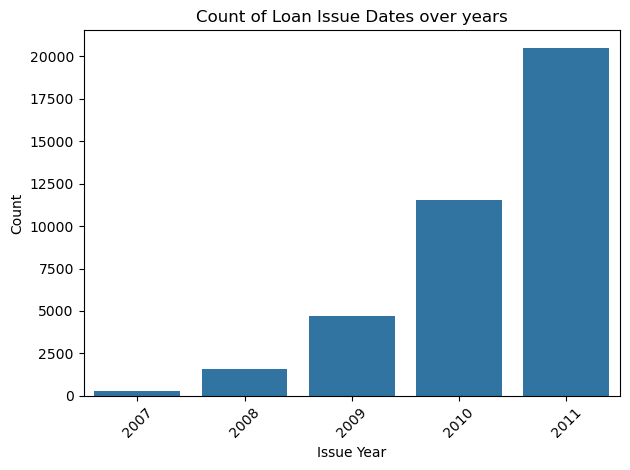

In [864]:
#visualising lending behaviour over the period of years
data['issue_year'] = data['issue_year']
sns.countplot(data=data, x='issue_year')
plt.title('Count of Loan Issue Dates over years')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()
plt.show()

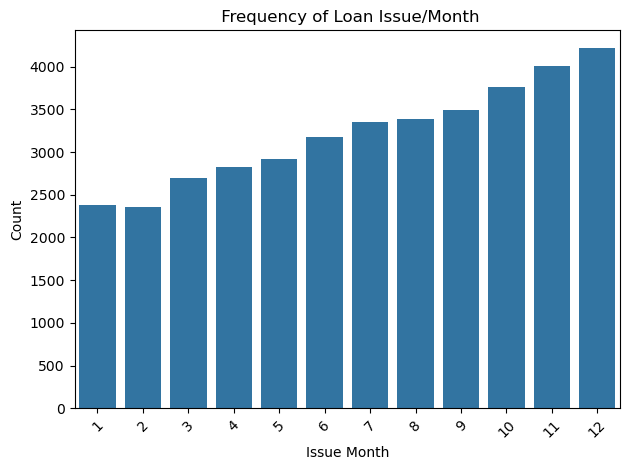

In [866]:
#visualising lending behaviour over the period of years
data['issue_year'] = data['issue_month']
sns.countplot(data=data, x='issue_month')
plt.title(' Frequency of Loan Issue/Month')
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()
plt.show()

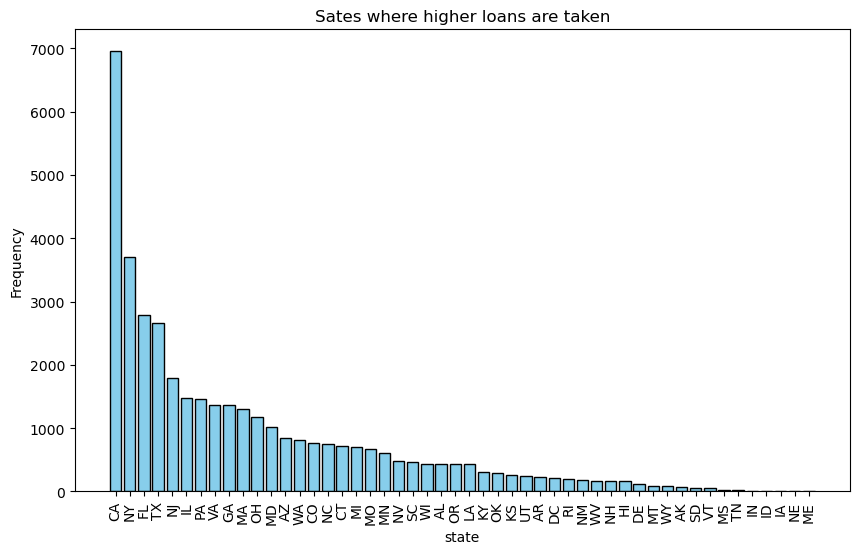

In [868]:
emp_length_counts = data['addr_state'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(emp_length_counts.index, emp_length_counts.values, color='skyblue', edgecolor='black')
plt.title('Sates where higher loans are taken')
plt.xlabel('state')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

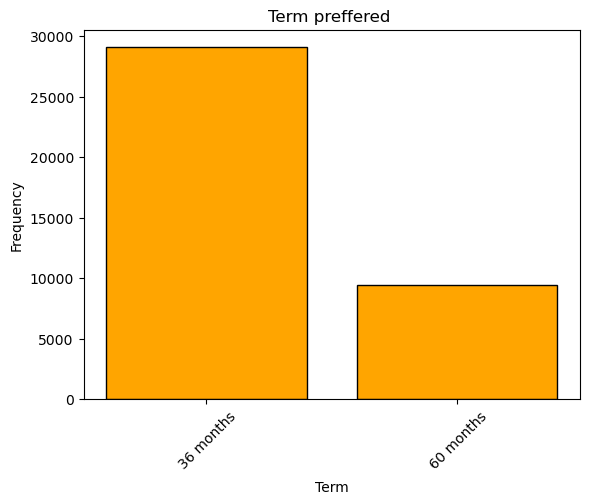

In [870]:
#Visualising Generally what term is prefered by user
emp_length_counts = data['term'].value_counts()
plt.bar(emp_length_counts.index, emp_length_counts.values, color='orange', edgecolor='black')
plt.title('Term preffered ')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

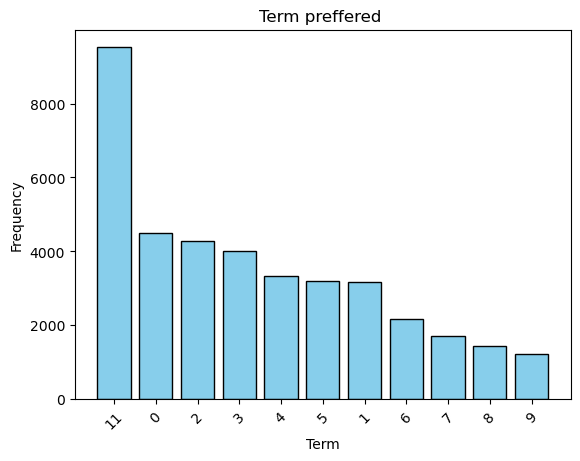

In [872]:
#Visualising How many year experienced employee takes more loan 
emp_length_counts = data['emp_length'].value_counts()
plt.bar(emp_length_counts.index, emp_length_counts.values, color='skyblue', edgecolor='black')
plt.title('Term preffered ')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

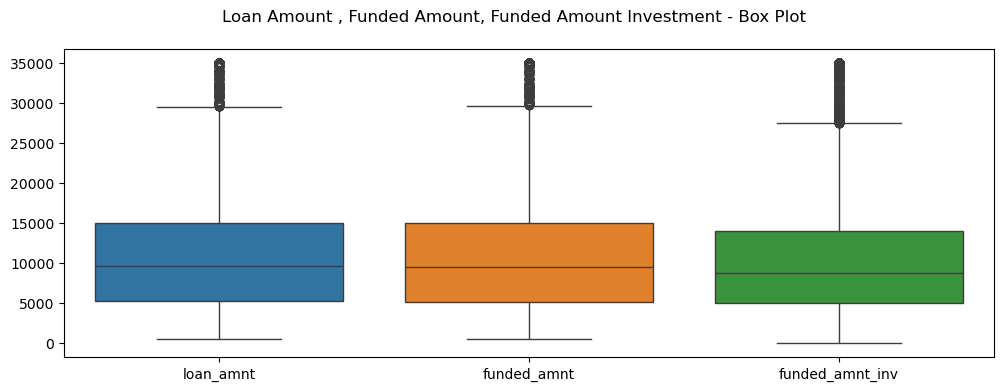

In [874]:
#Visulaising how does 
plt.figure(figsize=(12,4))
sns.boxplot(data=data[['loan_amnt','funded_amnt','funded_amnt_inv']])
plt.suptitle('Loan Amount , Funded Amount, Funded Amount Investment - Box Plot')
plt.show()

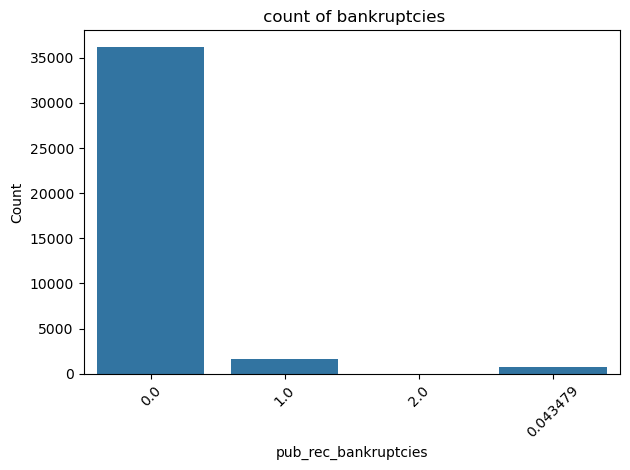

In [876]:
#visualising lending behaviour over the period of years
sns.countplot(data=data, x='pub_rec_bankruptcies')
plt.title(' count of bankruptcies')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()
plt.show()

# Segmented Univariant Analysis


In [879]:
#Defining a function for re using and ploting 2 column
def segunivariateAnalysis(x,hue, xsize, ysize):
    plt.subplots(figsize=(xsize, ysize))
    plt.xticks(rotation=45)
    seguni=sns.countplot(x=x, hue=hue, data=data)
    plt.show()
    return seguni

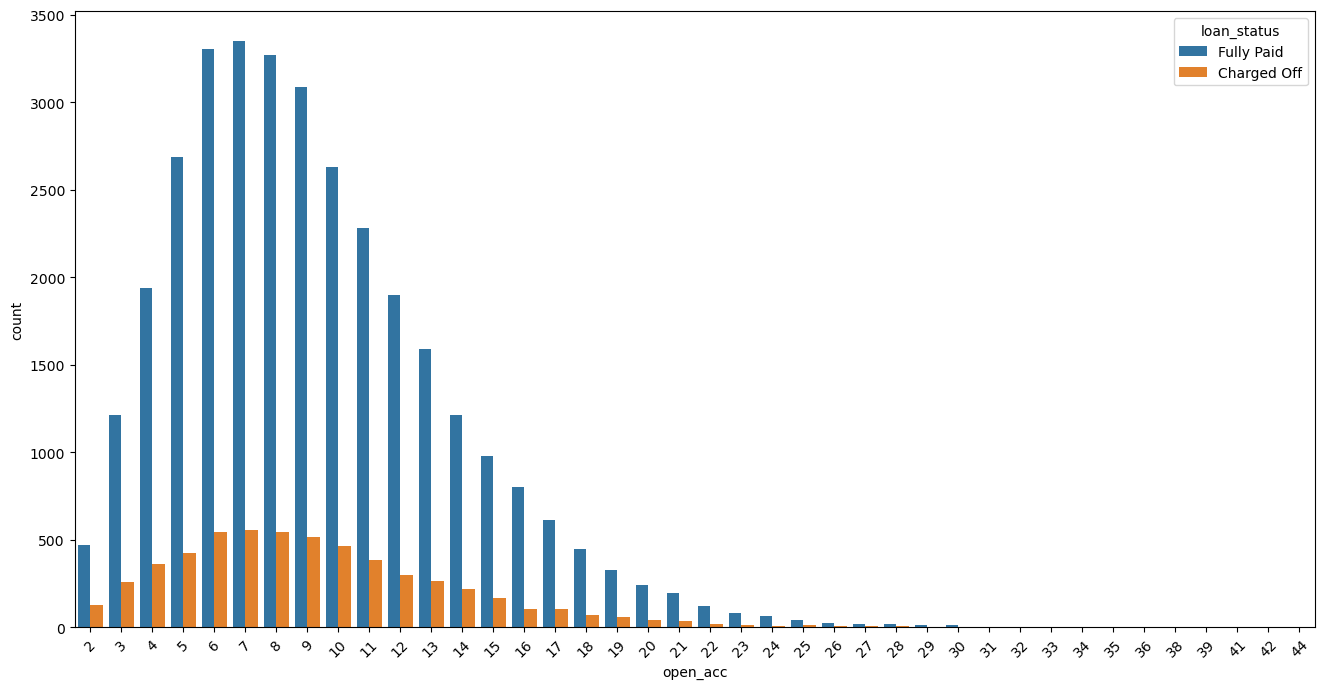

<Axes: xlabel='open_acc', ylabel='count'>

In [881]:
segunivariateAnalysis('open_acc',"loan_status", 16, 8)

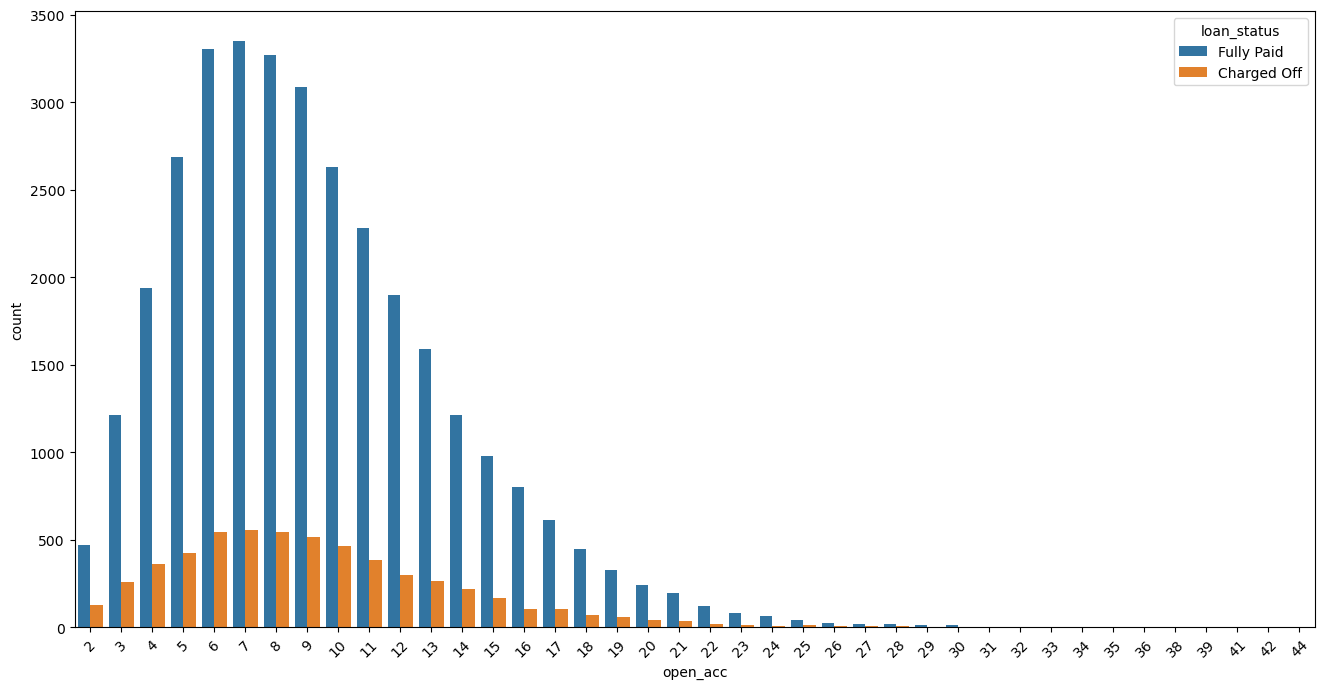

<Axes: xlabel='open_acc', ylabel='count'>

In [926]:
#visualising 
segunivariateAnalysis('open_acc',"loan_status", 16, 8)

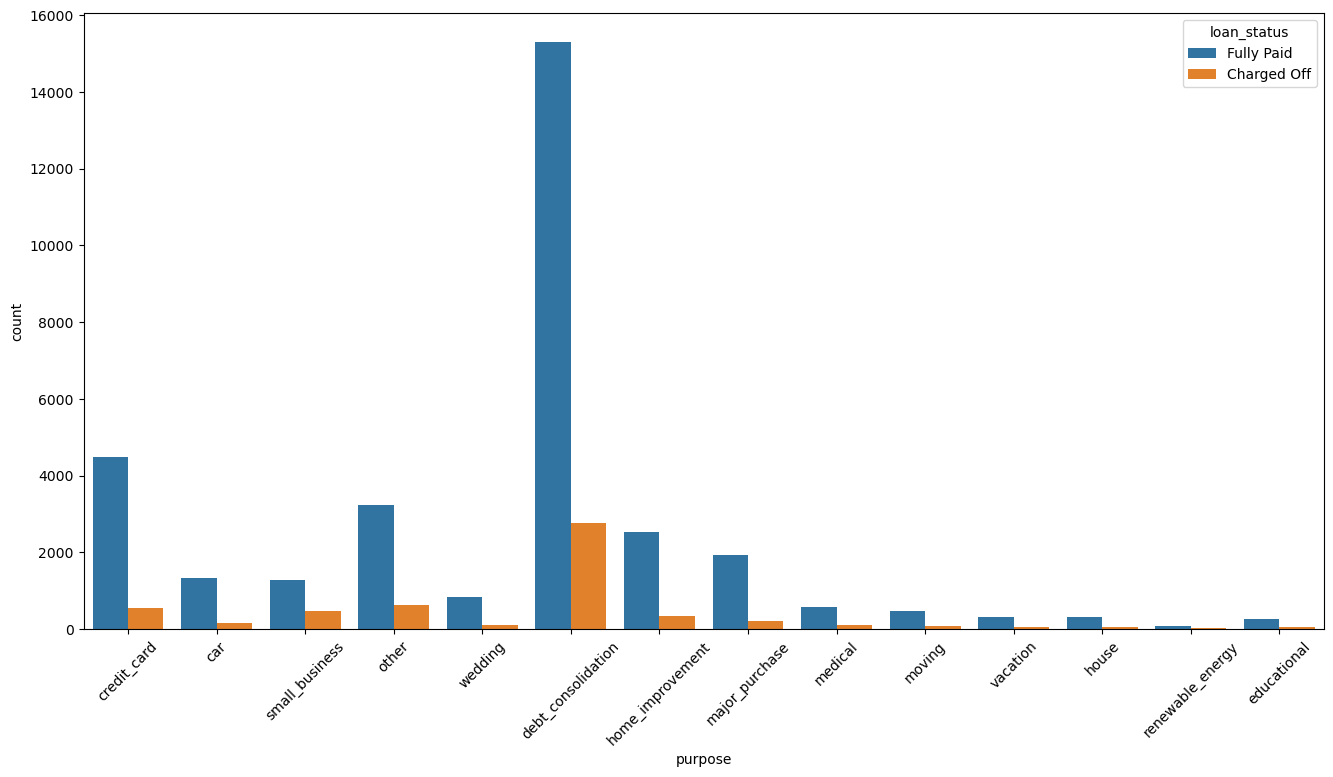

<Axes: xlabel='purpose', ylabel='count'>

In [885]:
segunivariateAnalysis('purpose',"loan_status", 16, 8)

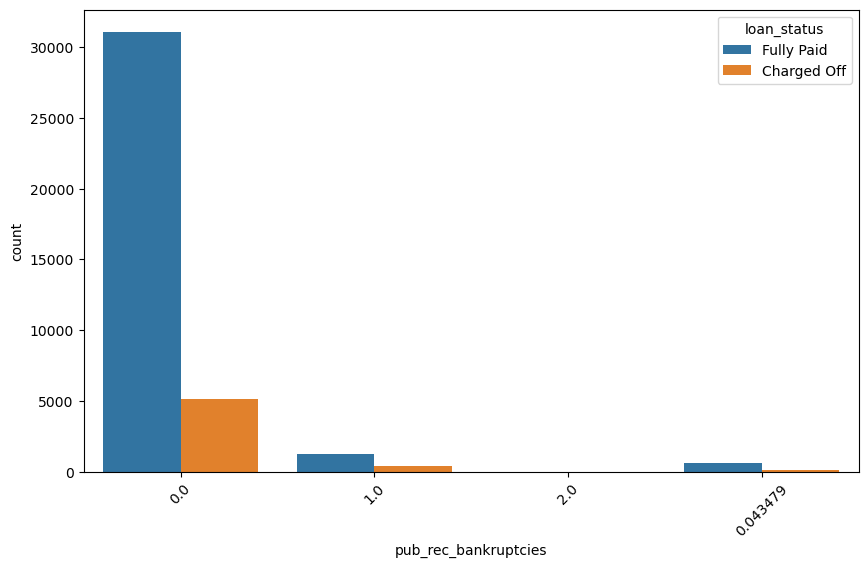

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

In [887]:
segunivariateAnalysis('pub_rec_bankruptcies',"loan_status", 10, 6)

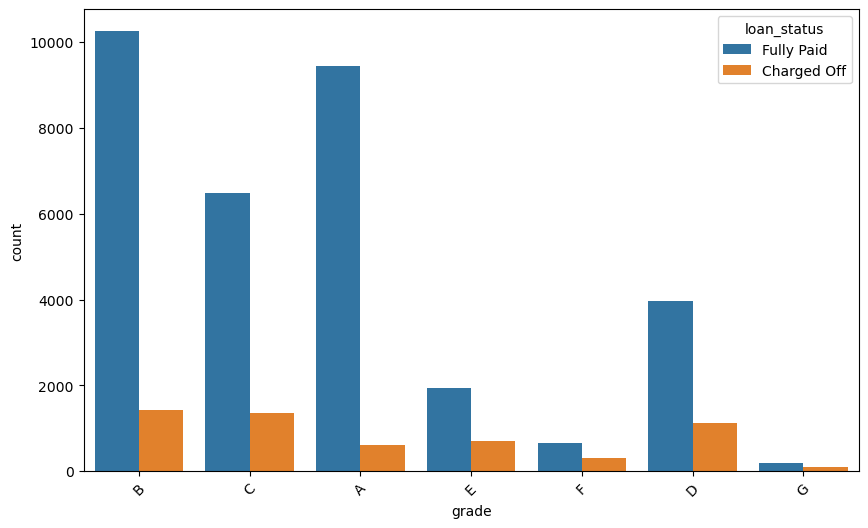

<Axes: xlabel='grade', ylabel='count'>

In [889]:
segunivariateAnalysis('grade',"loan_status", 10, 6)

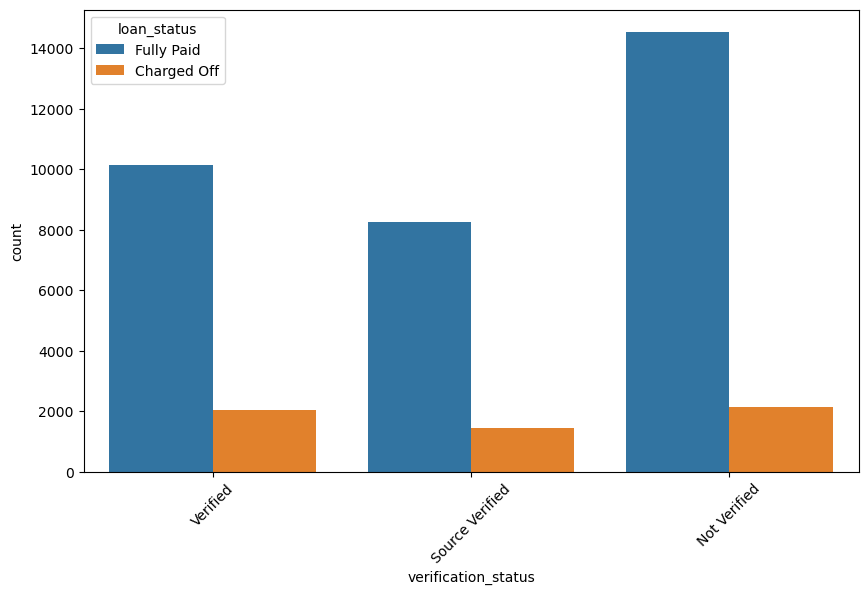

<Axes: xlabel='verification_status', ylabel='count'>

In [891]:
segunivariateAnalysis('verification_status',"loan_status", 10, 6)

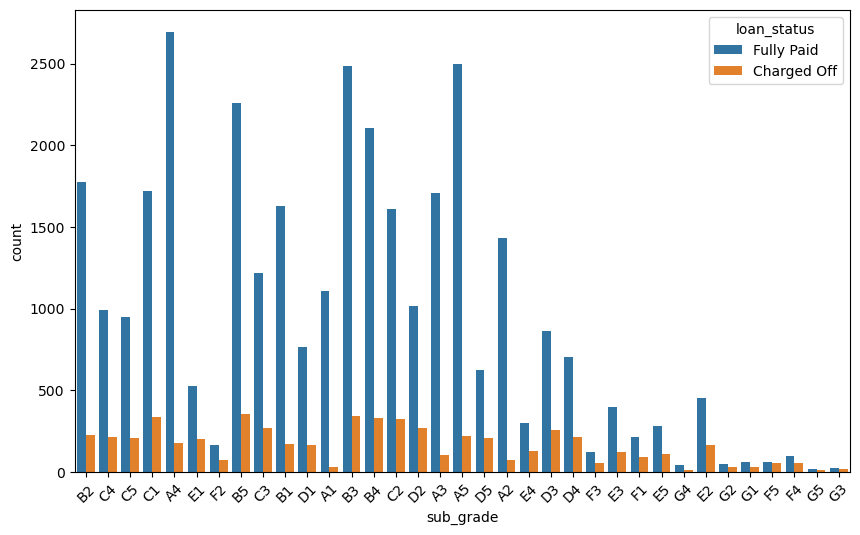

<Axes: xlabel='sub_grade', ylabel='count'>

In [893]:
segunivariateAnalysis('sub_grade',"loan_status", 10, 6)

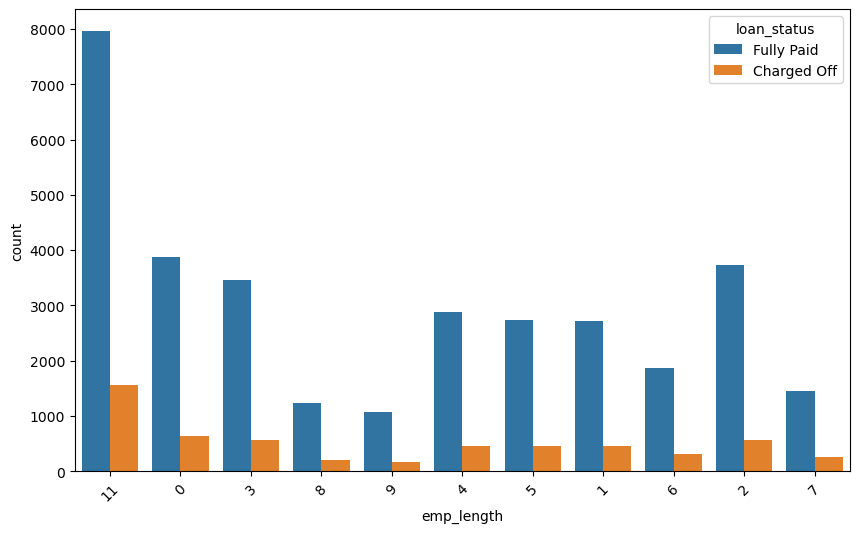

<Axes: xlabel='emp_length', ylabel='count'>

In [895]:
segunivariateAnalysis('emp_length',"loan_status", 10, 6)

# Bivariant Analysis

In [898]:
#Creating Definition for Percentage Calculation for loan status, loan status bar chart, hisplot inorder to minimize the coding
def loanstatusdef(x,y):
    plt.subplots(figsize=(20, 8))
    plt.tight_layout() 
    key_vs_loan = data.groupby([x, y])[y].count().unstack().reset_index()
    key_vs_loan['Charged Off']= key_vs_loan['Charged Off'].fillna(0)
    key_vs_loan['Fully Paid']=key_vs_loan['Fully Paid'].fillna(0)
    key_vs_loan['Total']=key_vs_loan['Charged Off']+key_vs_loan['Fully Paid']
    key_vs_loan['Chargedoff_Proportion'] = key_vs_loan['Charged Off']*100/key_vs_loan['Total']
    key_vs_loan['FullPaid_Proportion'] = key_vs_loan['Fully Paid']*100/key_vs_loan['Total']
    perctable=key_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
    percchart=sns.barplot(x=x, y='Chargedoff_Proportion', data=key_vs_loan)
    plt.show()
    return perctable,percchart

In [900]:
#Analysing how annual income has varies with different parameter by binning it
data['annual_inc_bin']=pd.cut(data['annual_inc'], [0,20000,40000,60000,80000,100000,120000,160000], labels=['0-20000','20000-40000','40000-60000','60000-80000','80000-100000','100000-120000','120000-160000'])
data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,annual_inc_bin
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,11,RENT,...,0,1,3,13648,83.7,9,0.0,12,12,20000-40000


/var/folders/hx/jz42g3lx1md5qddcn0hbn0_h0000gn/T/ipykernel_42237/565626856.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  key_vs_loan = data.groupby([x, y])[y].count().unstack().reset_index()


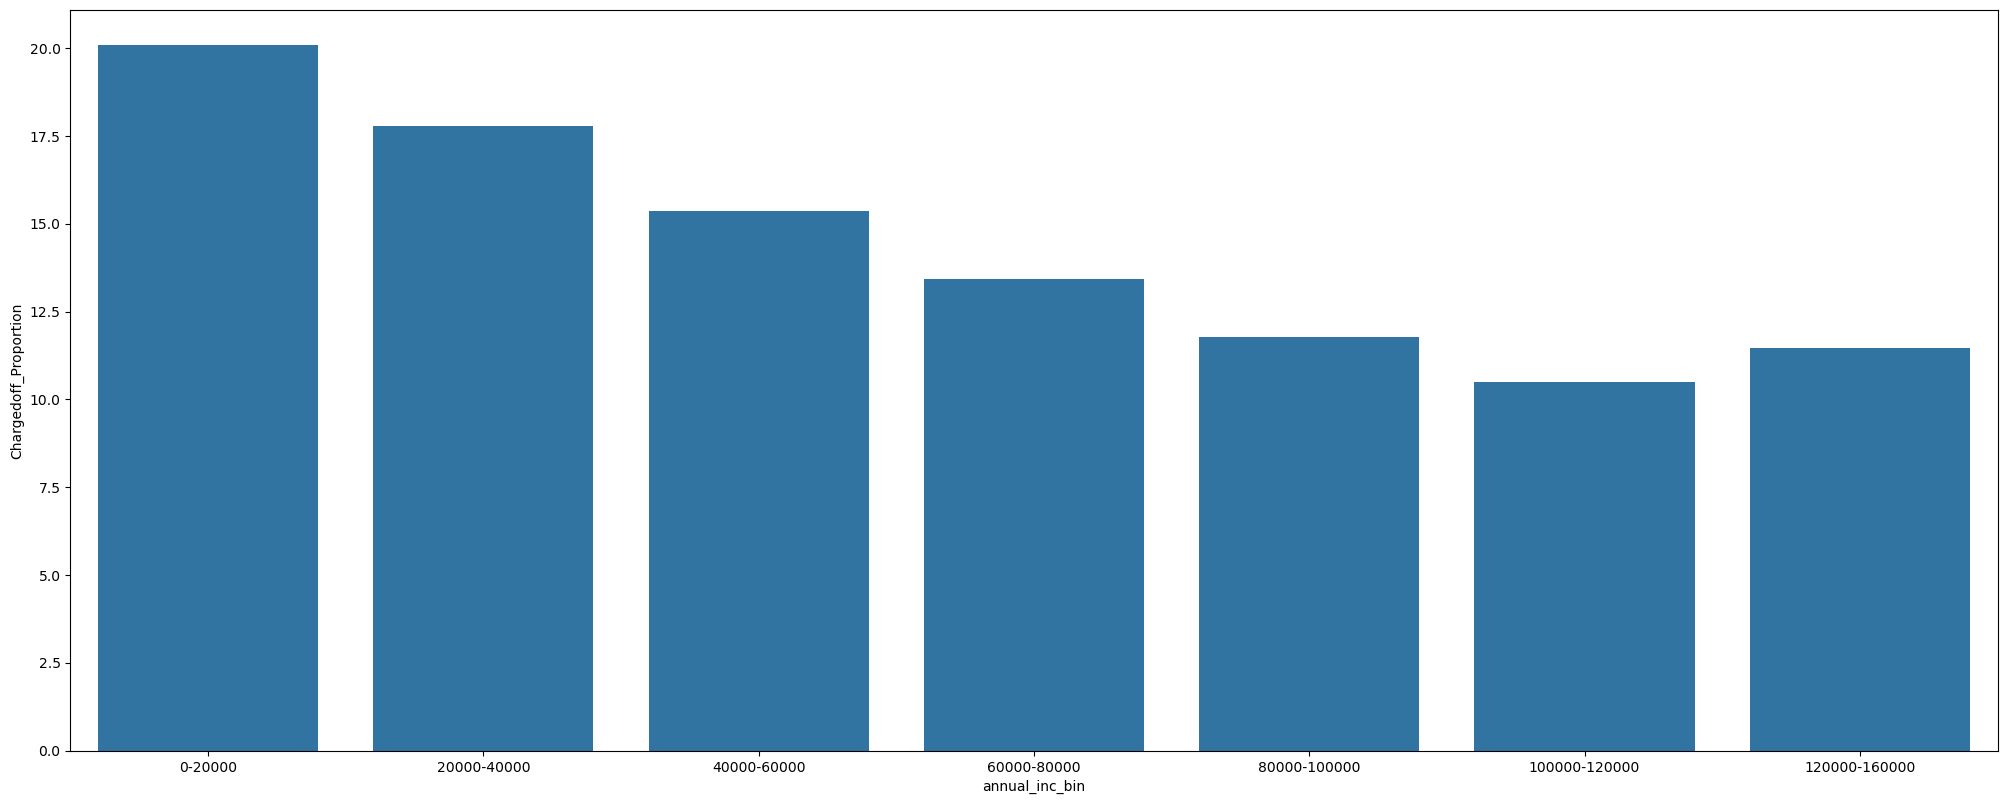

loan_status,annual_inc_bin,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
0,0-20000,237,943,1180,20.084746,79.915254
1,20000-40000,1514,7004,8518,17.774125,82.225875
2,40000-60000,1729,9534,11263,15.351150,84.648850
3,60000-80000,1024,6597,7621,13.436557,86.563443
4,80000-100000,531,3983,4514,11.763403,88.236597
6,120000-160000,221,1707,1928,11.462656,88.537344
5,100000-120000,244,2084,2328,10.481100,89.518900


In [924]:
tab,char=loanstatusdef('annual_inc_bin', 'loan_status')
pd.DataFrame(tab)

/var/folders/hx/jz42g3lx1md5qddcn0hbn0_h0000gn/T/ipykernel_42237/565626856.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  key_vs_loan = data.groupby([x, y])[y].count().unstack().reset_index()


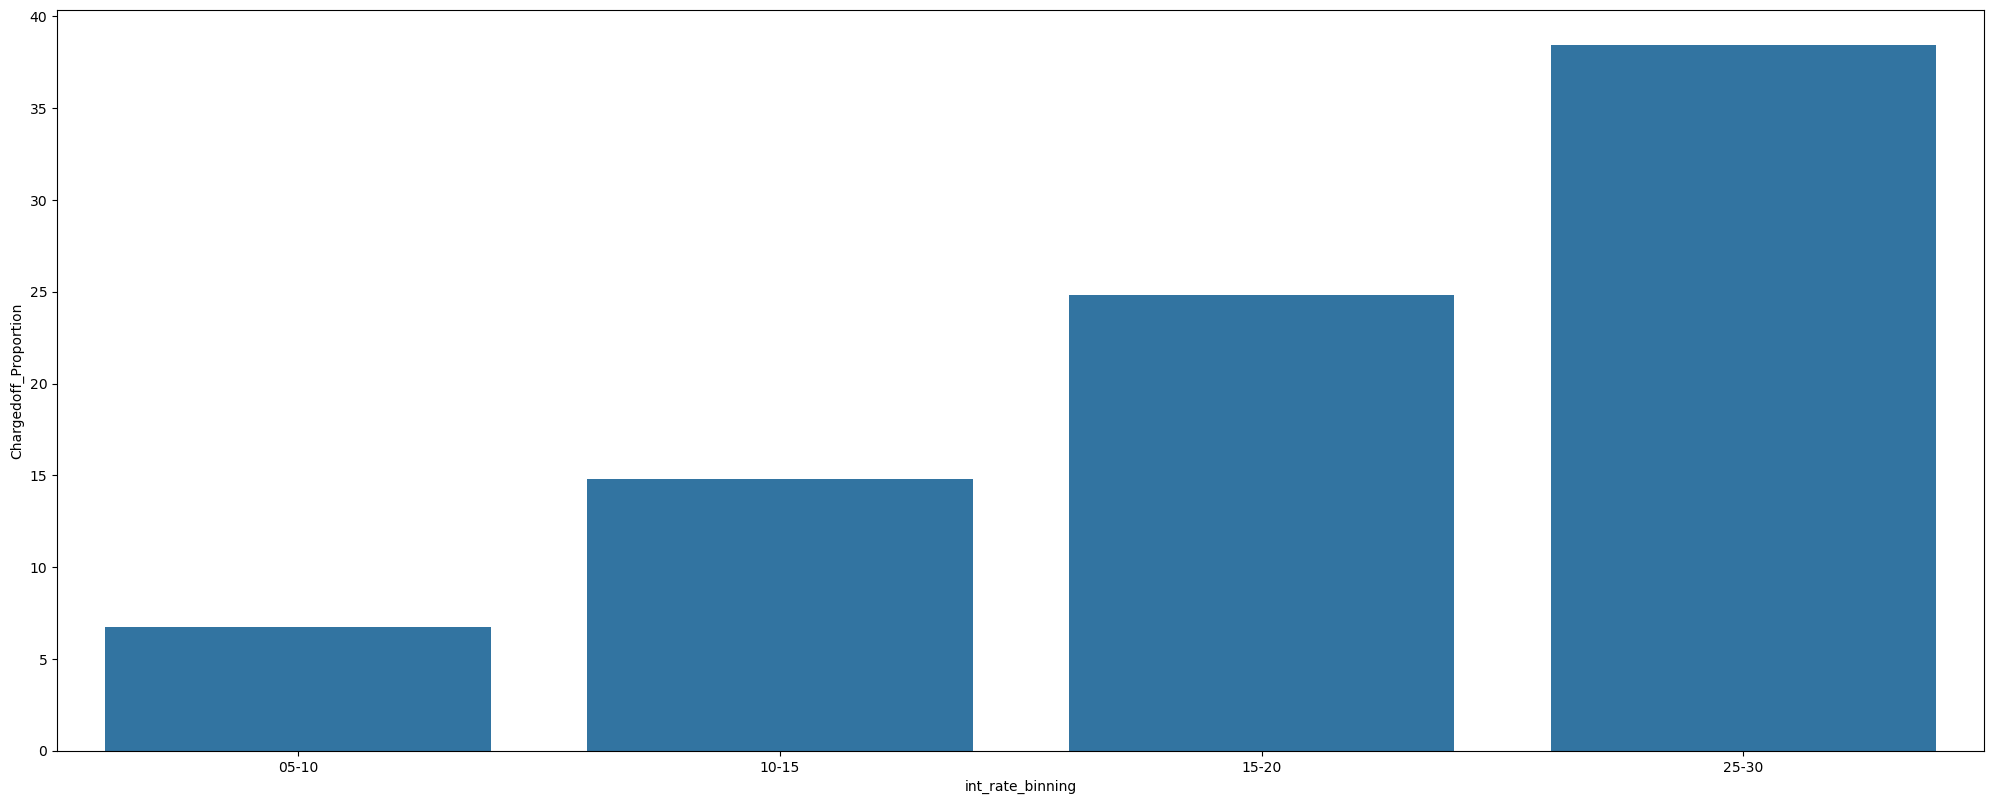

loan_status,int_rate_binning,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
3,25-30,296,474,770,38.441558,61.558442
2,15-20,1794,5432,7226,24.827014,75.172986
1,10-15,2707,15558,18265,14.820695,85.179305
0,05-10,830,11486,12316,6.739201,93.260799


In [902]:
#visualising intrest vs Laon status
data['int_rate_binning'] = pd.cut(data['int_rate'], [5, 10, 15, 20, 25], labels=['05-10', '10-15', '15-20', '25-30'])
tab,char=loanstatusdef('int_rate_binning', 'loan_status')
pd.DataFrame(tab)

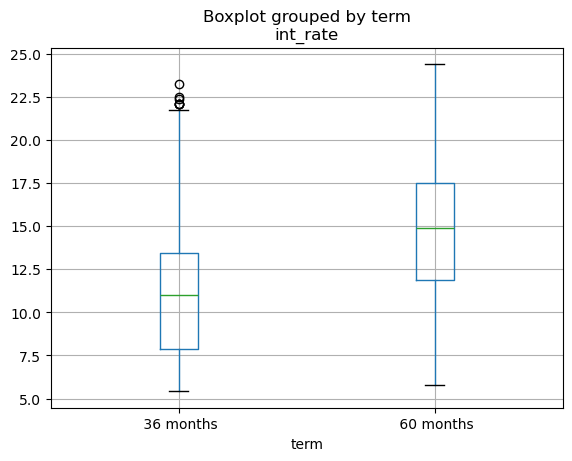

In [904]:
#visualising intrest rate for different term
data.boxplot(column='int_rate', by='term')
plt.show()

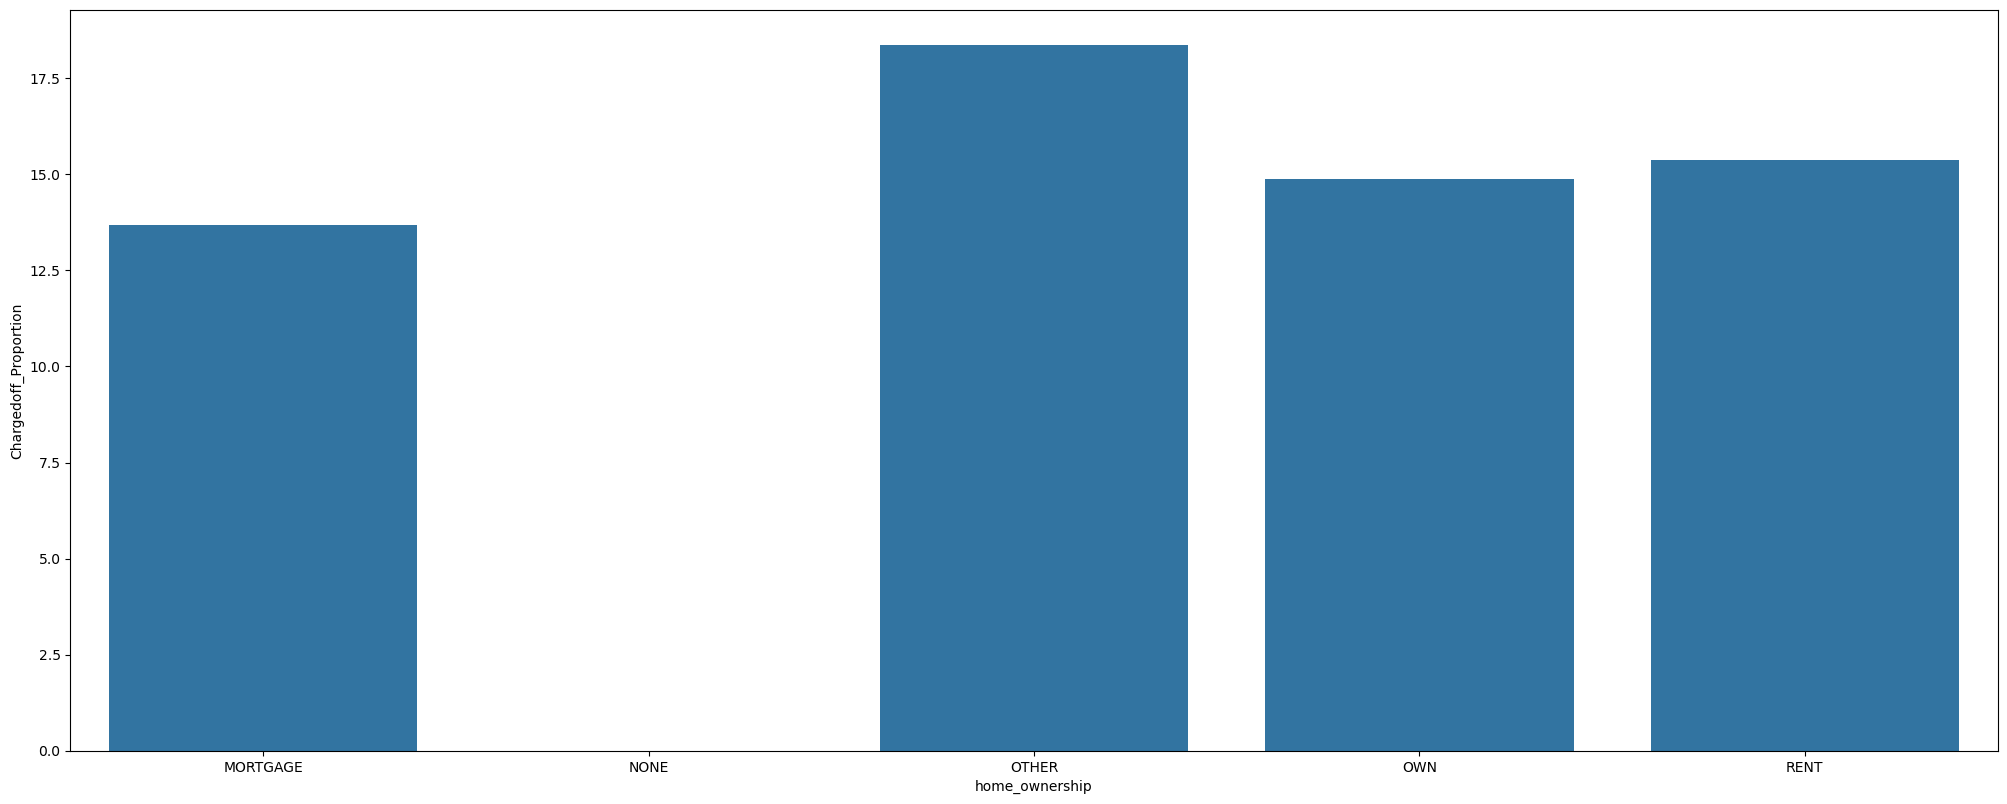

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
2,OTHER,18.0,80.0,98.0,18.367347,81.632653
4,RENT,2839.0,15641.0,18480.0,15.362554,84.637446
3,OWN,443.0,2532.0,2975.0,14.890756,85.109244
0,MORTGAGE,2327.0,14694.0,17021.0,13.671347,86.328653
1,NONE,0.0,3.0,3.0,0.000000,100.000000


In [906]:
tab,char=loanstatusdef('home_ownership', 'loan_status')
pd.DataFrame(tab)

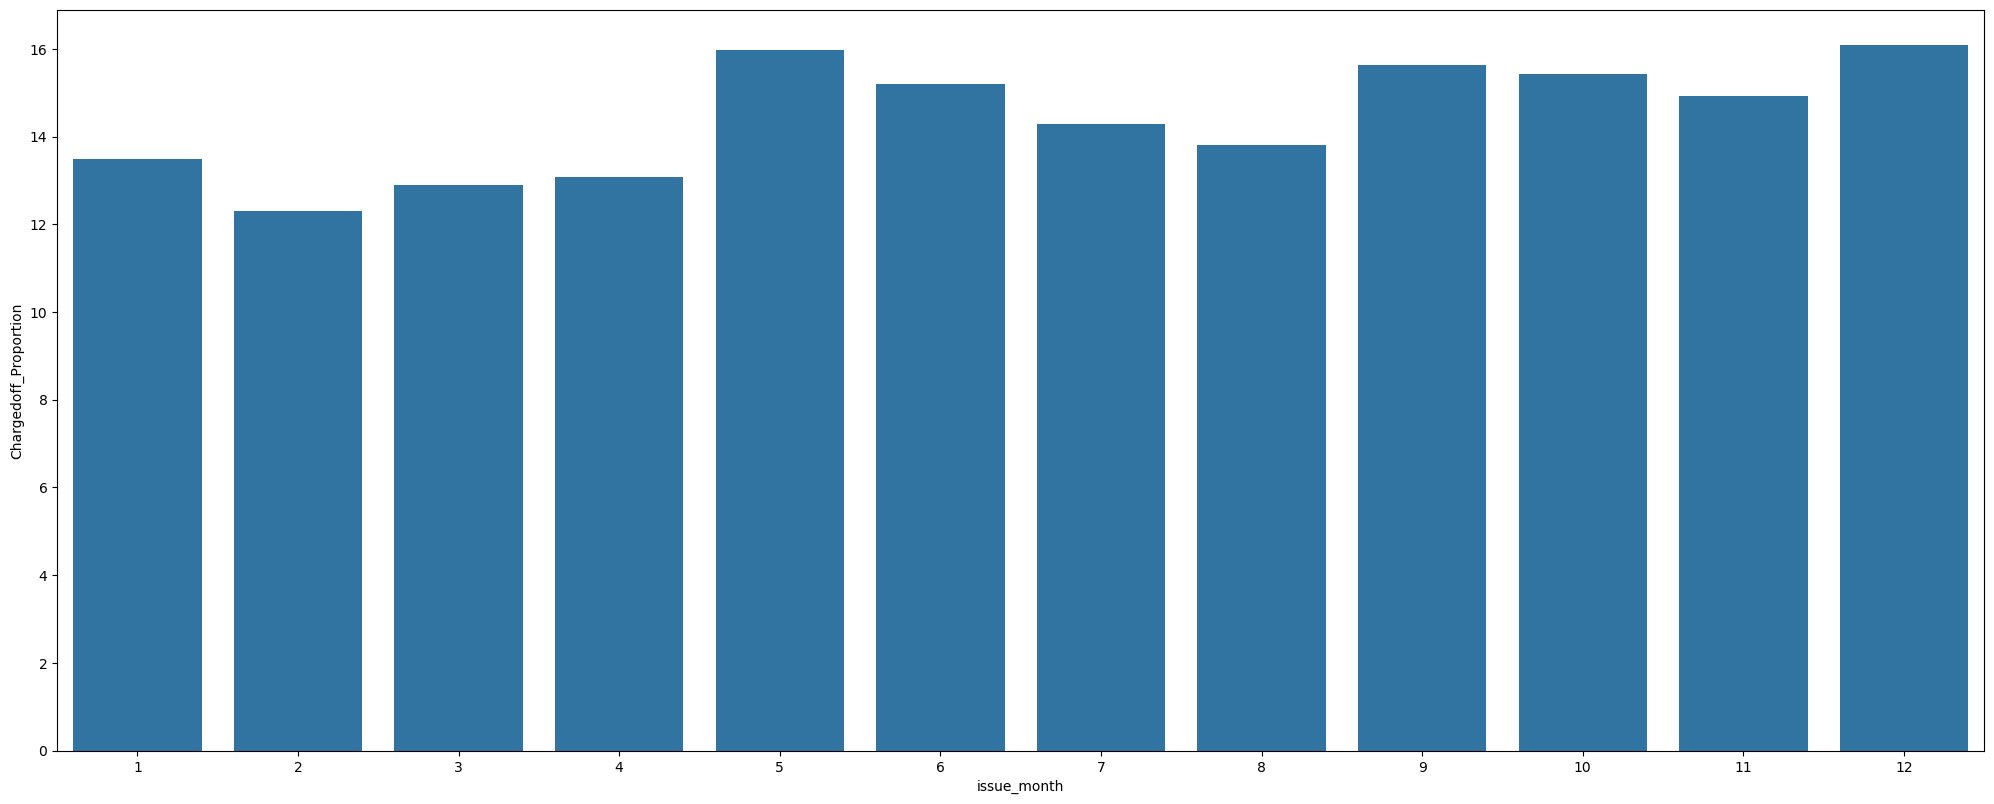

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion,FullPaid_Proportion
11,12,678,3537,4215,16.085409,83.914591
4,5,466,2453,2919,15.964371,84.035629
8,9,547,2951,3498,15.637507,84.362493
9,10,580,3181,3761,15.421430,84.578570
5,6,483,2697,3180,15.188679,84.811321
10,11,598,3408,4006,14.927609,85.072391
6,7,479,2872,3351,14.294241,85.705759
7,8,468,2920,3388,13.813459,86.186541
0,1,321,2058,2379,13.493064,86.506936
3,4,370,2461,2831,13.069587,86.930413


In [908]:
tab,char=loanstatusdef('issue_month', 'loan_status')
pd.DataFrame(tab)

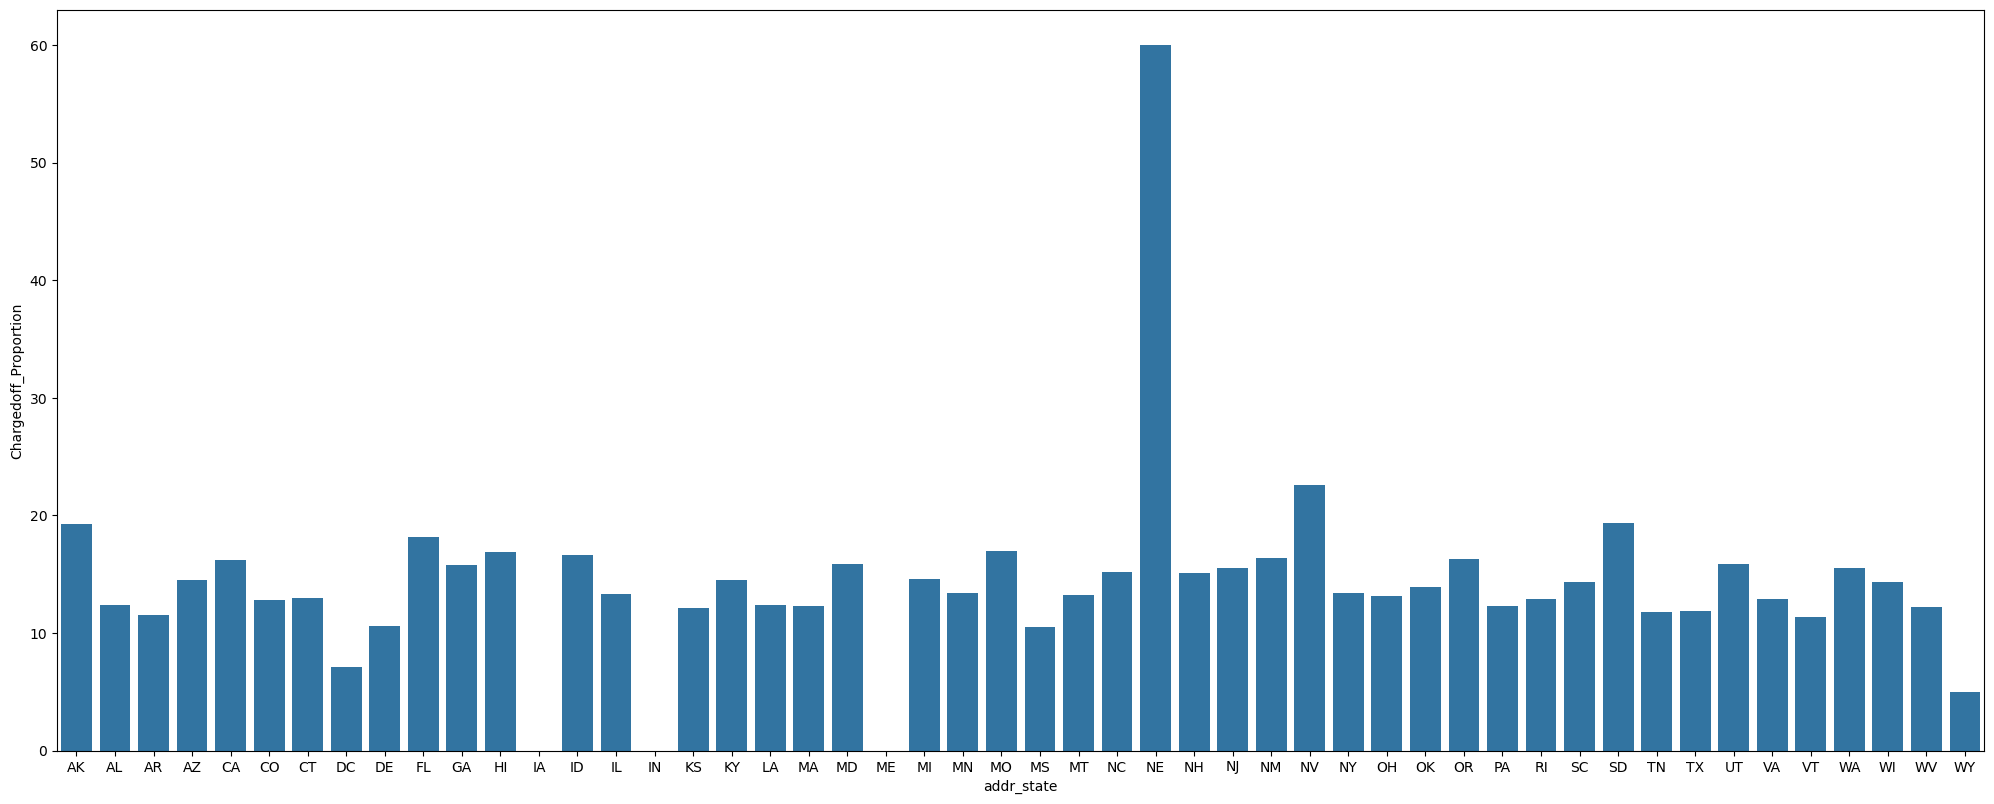

In [930]:
char=loanstatusdef('addr_state', 'loan_status')

<Figure size 1200x800 with 0 Axes>

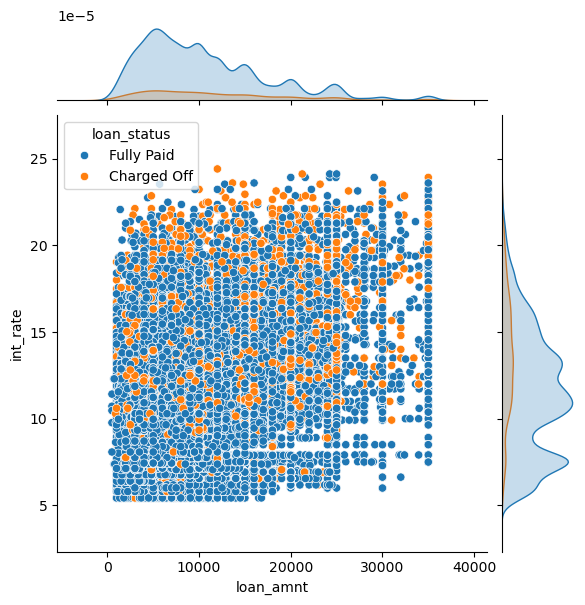

In [912]:
#visualising annual income and intrest rate relation 
plt.figure(figsize=(12,8))
sns.jointplot(x="loan_amnt",
                    y="int_rate",
                    hue='loan_status',
                    data=outliers_removed)

<Figure size 1200x800 with 0 Axes>

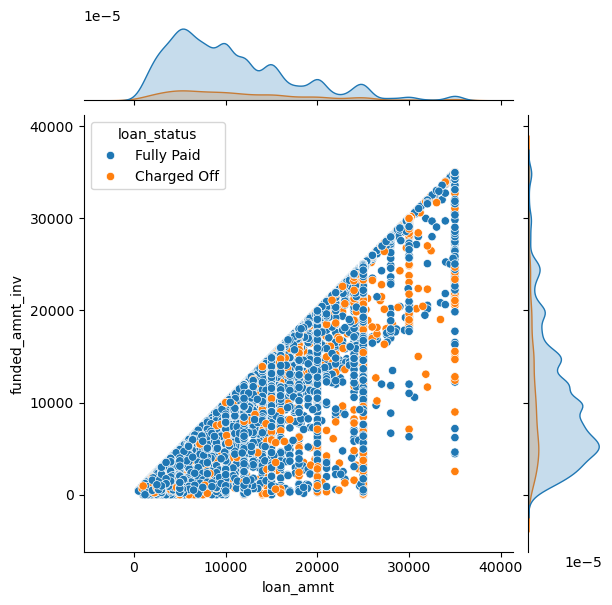

In [913]:
#visualising annual income and funded amount investment relation 
plt.figure(figsize=(12,8))
sns.jointplot(x="loan_amnt",
                    y="funded_amnt_inv",
                    hue='loan_status',
                    data=outliers_removed)

# Multi variant Analysis

<Axes: xlabel='loan_status', ylabel='funded_amnt_inv'>

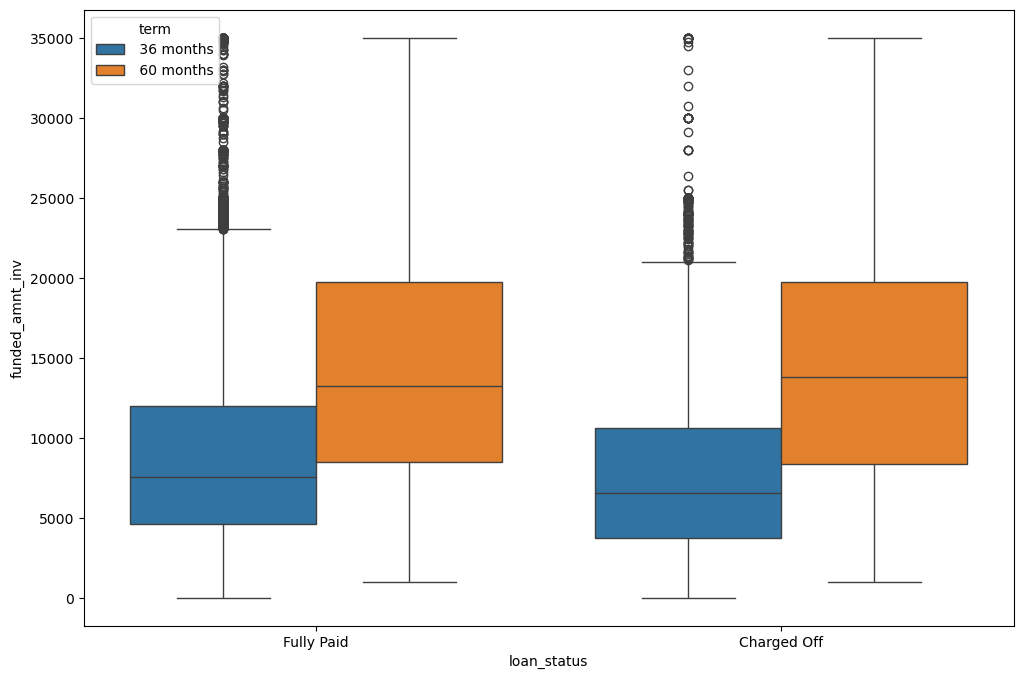

In [916]:
#visualising relation betweeen loan_status, funded_amnt_inv, term
plt.figure(figsize=(12,8))
sns.boxplot(x="loan_status", y="funded_amnt_inv", hue='term', data=data)

<Figure size 1200x800 with 0 Axes>

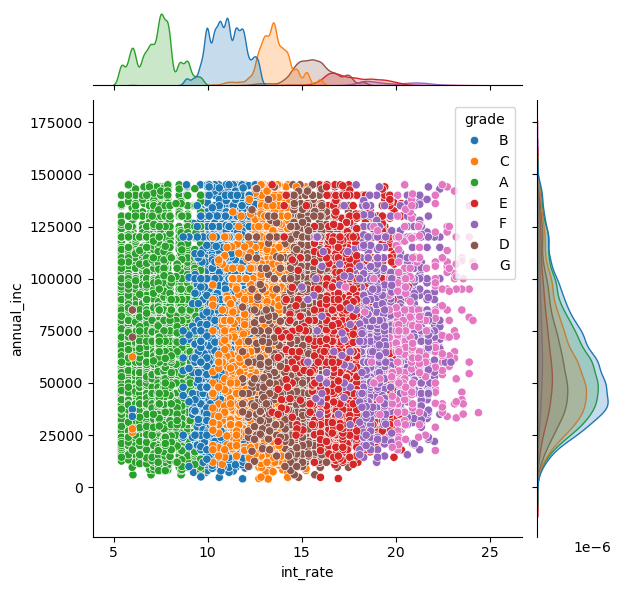

In [928]:
#Understanding Annual Income vs Interest Rate Vs Grade
plt.figure(figsize=(12,8))
sns.jointplot(x="int_rate",
                    y="annual_inc",
                    hue='grade',
                    data=outliers_removed)

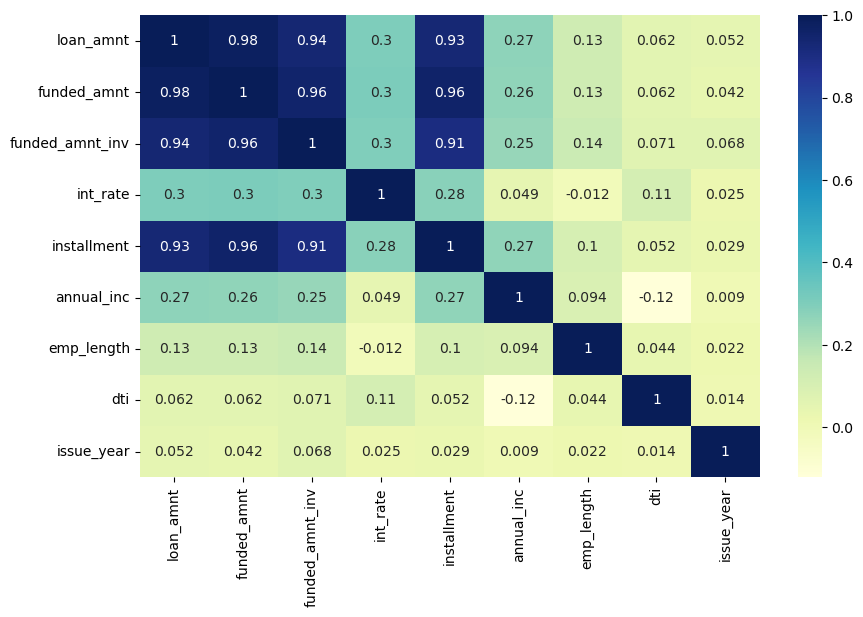

In [920]:
#Corelation between varables 
laons_corr_df = data.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate','installment','annual_inc','emp_length','dti','issue_year']) 
cor = laons_corr_df.corr()
round(cor, 3)

#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,6))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()